## Import Packages

In [47]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as myplot
%matplotlib inline

## Import the Dataset

In [77]:
(x_train,y_train), (x_test,y_test)=mnist.load_data()

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the Image Data Format

In [79]:
x_train[0].shape

(28, 28)

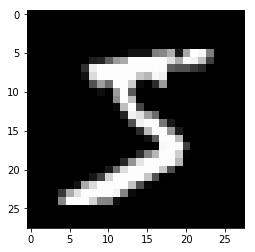

In [82]:
myplot.imshow(x_train[0],cmap='gray')

In [52]:
y_train[0]

5

## Preprocessing the Image Data

In [53]:
img_height,img_width=28,28

In [54]:
x_train=x_train.reshape(60000, img_height*img_width)
x_test=x_test.reshape(10000,img_height*img_width)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [55]:
print (x_train[0])
x_train.astype('float32')
x_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [56]:
x_train=x_train/255.0
x_test=x_test/255.0
print(x_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [57]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print (y_train.shape)
print (y_test.shape)

(60000, 10)
(10000, 10)


## Building the Model

In [58]:
model=Sequential()

In [59]:
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

## Compiling the Model

In [60]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [66]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 32s 530us/step - loss: 0.1841 - acc: 0.9430 - val_loss: 0.0961 - val_acc: 0.9704
Epoch 2/20
60000/60000 [==============================] - 31s 517us/step - loss: 0.0795 - acc: 0.9752 - val_loss: 0.0784 - val_acc: 0.9747
Epoch 3/20
60000/60000 [==============================] - 31s 524us/step - loss: 0.0568 - acc: 0.9821 - val_loss: 0.0789 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 31s 522us/step - loss: 0.0416 - acc: 0.9865 - val_loss: 0.0733 - val_acc: 0.9786
Epoch 5/20
60000/60000 [==============================] - 31s 524us/step - loss: 0.0344 - acc: 0.9887 - val_loss: 0.0805 - val_acc: 0.9787
Epoch 6/20
60000/60000 [==============================] - 32s 527us/step - loss: 0.0281 - acc: 0.9916 - val_loss: 0.0721 - val_acc: 0.9814
Epoch 7/20
60000/60000 [==============================] - 32s 526us/step - loss: 0.0252 - acc: 0.9921 - val_loss: 0.

## Accuracy of the Model

### Plotting Accuracy of training set

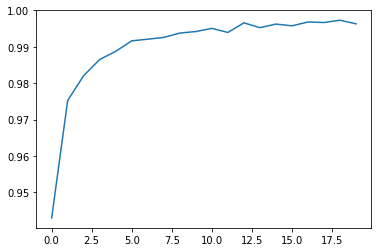

In [69]:
myplot.plot(history.history['acc'])

### Plotting Accuracy of training and validation set

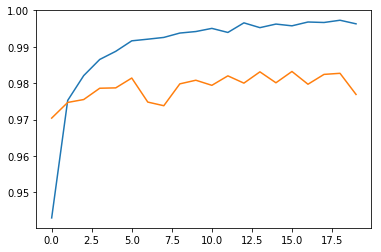

In [70]:
myplot.plot(history.history['acc'])
myplot.plot(history.history['val_acc'])

### Plotting Accuracy of training set, validation set and Loss 

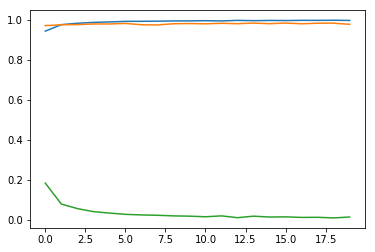

In [71]:
myplot.plot(history.history['acc'])
myplot.plot(history.history['val_acc'])
myplot.plot(history.history['loss'])

## Evaluating the Model

In [72]:
score=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 81us/step


In [73]:
score

[0.14471454372407375, 0.9769]